# Titanic Survival Prediction

This notebook explores the famous Titanic dataset and builds a machine learning model to predict passenger survival. The sinking of the RMS Titanic is one of the most infamous shipwrecks in history, where 1502 out of 2224 passengers and crew lost their lives.

## Project Objectives
1. Data exploration and visualization to understand patterns and relationships
2. Data preprocessing and feature engineering
3. Building a predictive model using Logistic Regression
4. Evaluating model performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the Titanic dataset
# Using seaborn's built-in titanic dataset since it's readily available
titanic = sns.load_dataset('titanic')
print("Dataset Loaded. Shape:", titanic.shape)
print(titanic.head())


Dataset Loaded. Shape: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Get information about the data
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


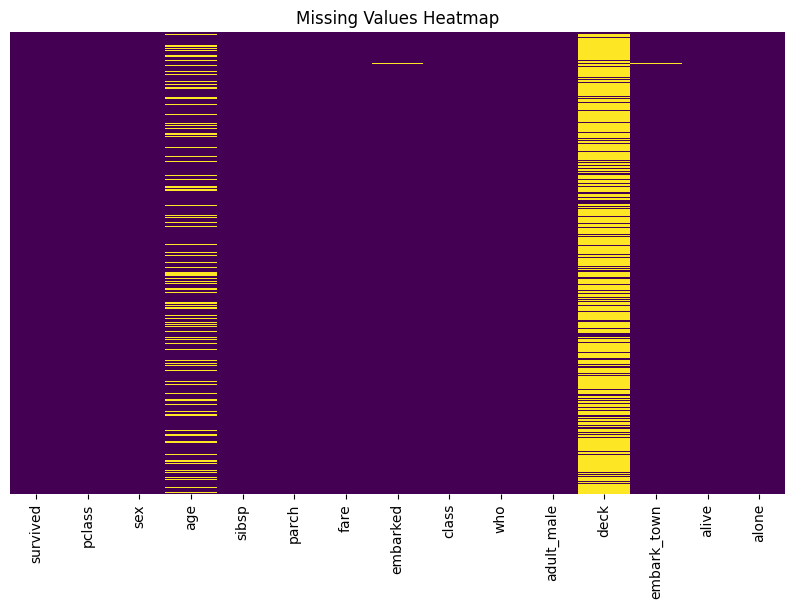

In [4]:
# Visualize missing values
plt.figure(figsize=(10, 6))  # Optional: adjust heatmap size
sns.heatmap(titanic.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [5]:
# Display count of missing values by column
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


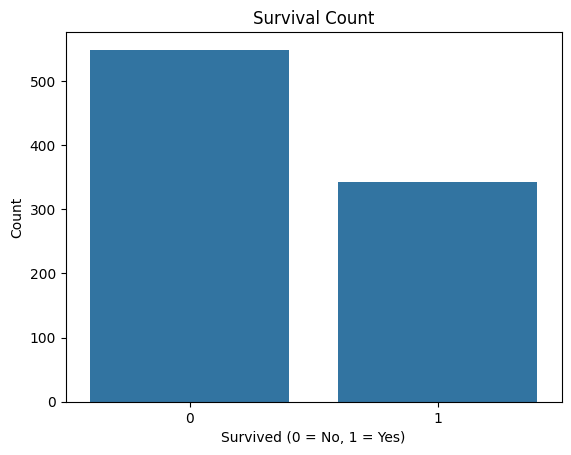

In [6]:
# Show survived count graph
sns.countplot(data=titanic, x='survived')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


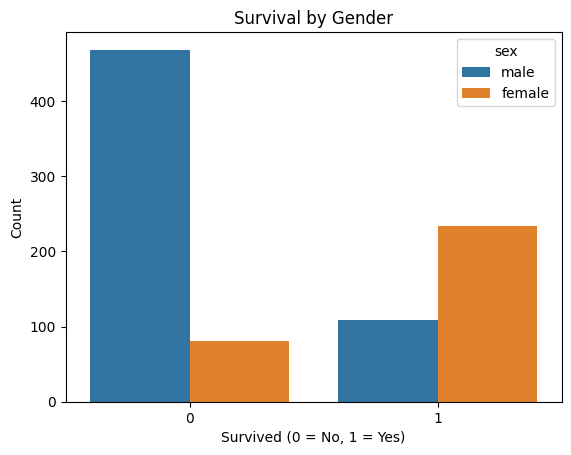

In [7]:
# Plot survival by gender
sns.countplot(data=titanic, x='survived', hue='sex')
plt.title("Survival by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

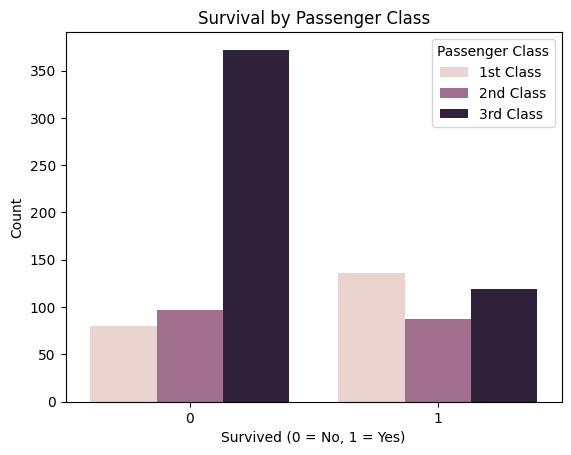

In [8]:
# Plot survival by passenger class
sns.countplot(data=titanic, x='survived', hue='pclass')
plt.title("Survival by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Passenger Class", labels=["1st Class", "2nd Class", "3rd Class"])
plt.show()

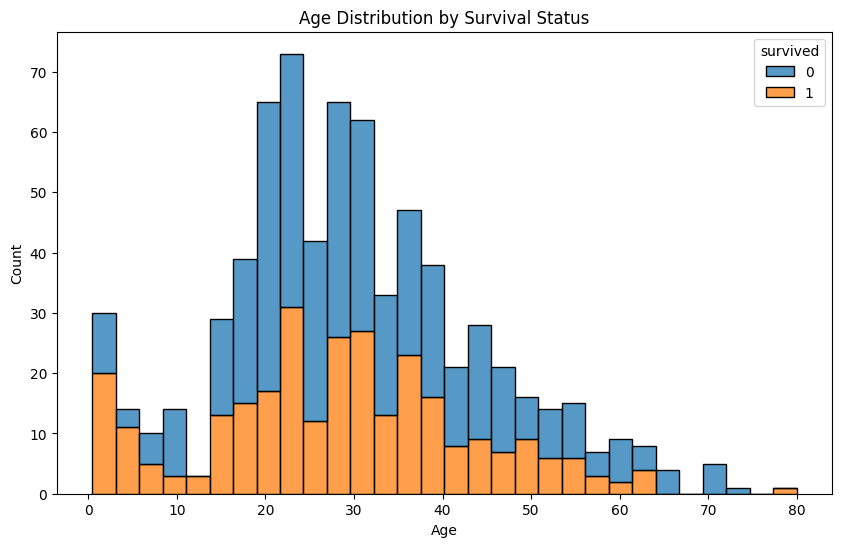

In [9]:
# Age distribution with survival information
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [12]:
# Data Preprocessing
# -----------------------------
# First, let's handle missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop unnecessary columns if they exist
cols_to_remove = ['deck', 'embark_town', 'alive', 'alone']
titanic = titanic.drop(columns=[col for col in cols_to_remove if col in titanic.columns])

# Display the columns after dropping
print("Columns after preprocessing:", titanic.columns.tolist())

# Drop unnecessary columns
cols_to_drop = ['class', 'who', 'adult_male']
titanic.drop(columns=[col for col in cols_to_drop if col in titanic.columns], inplace=True)


Columns after preprocessing: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male']


C:\Users\vaibh\AppData\Local\Temp\ipykernel_11544\58071781.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_11544\58071781.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Correlations with survival:
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.064910
pclass     -0.338481
Name: survived, dtype: float64


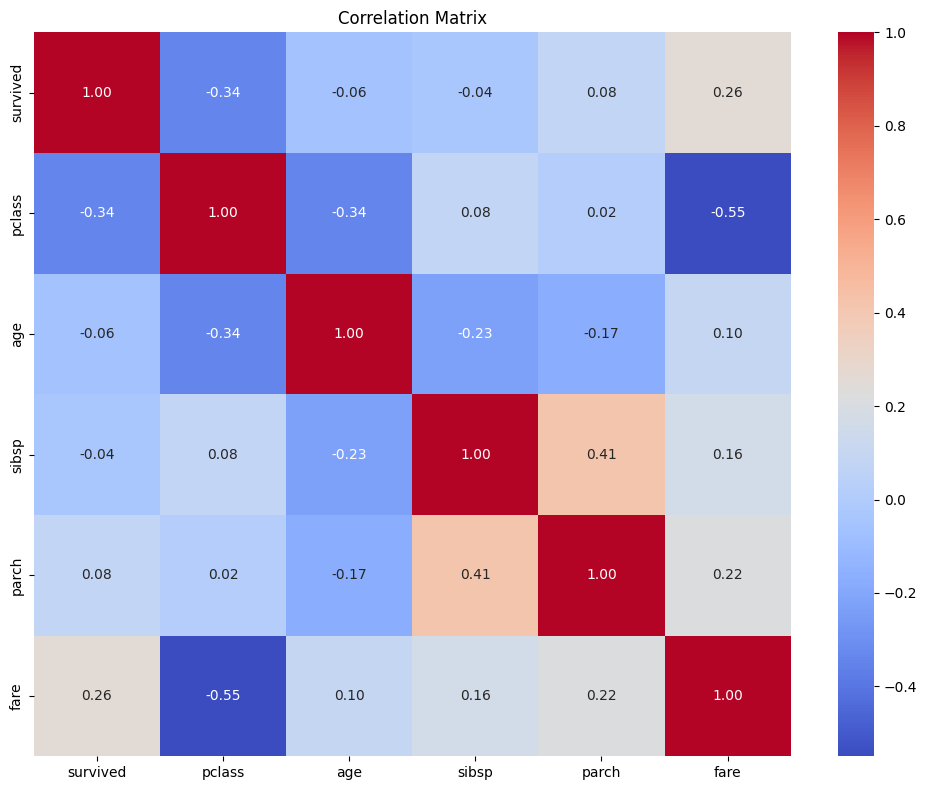

In [14]:
# Check correlations with survival
numerical_features = titanic.select_dtypes(include=['number']).columns
correlation = titanic[numerical_features].corr()['survived'].sort_values(ascending=False)
print("Correlations with survival:")
print(correlation)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(titanic[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [16]:
# Encode categorical features
label_enc = LabelEncoder()
titanic['sex'] = label_enc.fit_transform(titanic['sex'])  # male: 1, female: 0
titanic['embarked'] = label_enc.fit_transform(titanic['embarked'])  # C, Q, S to 0, 1, 2

# 'who' column has already been dropped, so no need to create dummy variables for it
# titanic = pd.get_dummies(titanic, columns=['who'], drop_first=True)

# Drop any remaining rows with missing values
titanic = titanic.dropna()

# Split data
X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 712 samples
Test set: 179 samples


In [17]:
# Model Training
# -------------------------
# Import additional models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Train logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Models trained successfully")


Models trained successfully


In [18]:
# Predictions
# -------------------------
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

# Prediction probabilities for ROC curve later
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]
dt_prob = dt.predict_proba(X_test)[:, 1]


In [19]:
# Evaluation
# -------------------------
from sklearn.metrics import roc_curve, auc

# Logistic Regression Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_reg_pred))
print("\nClassification Report:\n", classification_report(y_test, log_reg_pred))

# Random Forest Evaluation
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Decision Tree Evaluation
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))


Logistic Regression:
Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Random Forest:
Accuracy: 0.8212290502793296

Confusion Matrix:
 [[92 13]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Decision Tree:
Accuracy: 0.7821229050279329

Confusion Matrix:
 [[83 22]
 [17 57]]

Classification Report:
               

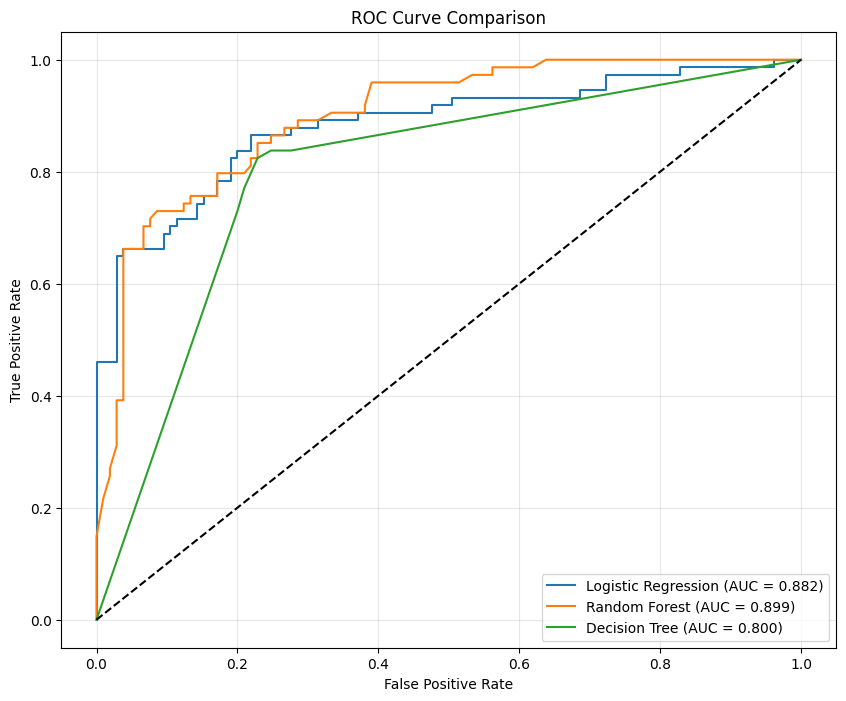

In [20]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# Decision Tree ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

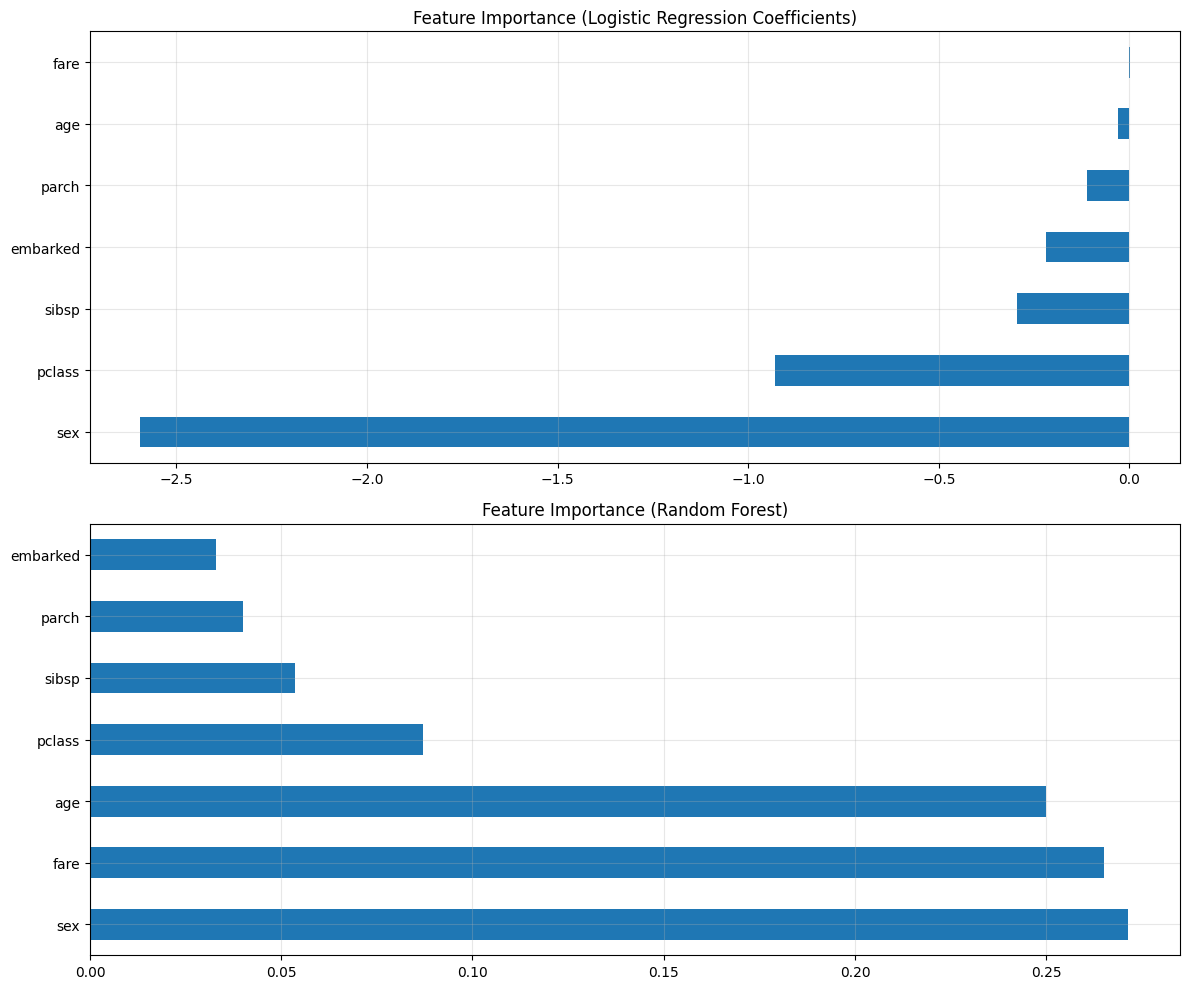

In [21]:
# Feature Importance
# -------------------------
plt.figure(figsize=(12, 10))

# Logistic Regression coefficients
plt.subplot(2, 1, 1)
importance_lr = pd.Series(log_reg.coef_[0], index=X.columns)
importance_lr.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.grid(True, alpha=0.3)

# Random Forest feature importance
plt.subplot(2, 1, 2)
importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
importance_rf.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [22]:
# Create a function to make predictions on new data
def predict_survival(pclass, sex, age, sibsp=0, parch=0, fare=30, embarked='S'):
    # Create a DataFrame with the input features
    data = pd.DataFrame({
        'pclass': [pclass],
        'sex': [sex],
        'age': [age],
        'sibsp': [sibsp],
        'parch': [parch],
        'fare': [fare],
        'embarked': [embarked]
    })
    
    # Encode categorical variables
    data['sex'] = 1 if sex == 'male' else 0
    data['embarked'] = {'C': 0, 'Q': 1, 'S': 2}[embarked]
    
    # Add who_* columns
    if age < 12:
        who_type = 'child'
    elif sex == 'female':
        who_type = 'woman'
    else:
        who_type = 'man'
        
    data['who_man'] = 1 if who_type == 'man' else 0
    data['who_woman'] = 1 if who_type == 'woman' else 0
    
    # Add any missing columns that the model expects
    missing_cols = set(X.columns) - set(data.columns)
    for col in missing_cols:
        data[col] = 0
        
    # Ensure columns are in the same order as during training
    data = data[X.columns]
    
    # Make predictions with all models
    prob_lr = log_reg.predict_proba(data)[0, 1]
    prob_rf = rf.predict_proba(data)[0, 1]
    prob_dt = dt.predict_proba(data)[0, 1]
    
    # Get the average probability
    avg_prob = (prob_lr + prob_rf + prob_dt) / 3
    
    return {
        'survival_probability': avg_prob,
        'logistic_regression_prob': prob_lr,
        'random_forest_prob': prob_rf,
        'decision_tree_prob': prob_dt,
        'would_survive': avg_prob > 0.5
    }

# Example usage
print("Example prediction for a 30-year-old male in 3rd class:")
prediction = predict_survival(pclass=3, sex='male', age=30)
print(prediction)

print("\nExample prediction for an 8-year-old female in 1st class:")
prediction = predict_survival(pclass=1, sex='female', age=8)
print(prediction)

Example prediction for a 30-year-old male in 3rd class:
{'survival_probability': np.float64(0.0943082531850044), 'logistic_regression_prob': np.float64(0.10842475955501316), 'random_forest_prob': np.float64(0.1745), 'decision_tree_prob': np.float64(0.0), 'would_survive': np.False_}

Example prediction for an 8-year-old female in 1st class:
{'survival_probability': np.float64(0.9745038686808537), 'logistic_regression_prob': np.float64(0.9535116060425611), 'random_forest_prob': np.float64(0.97), 'decision_tree_prob': np.float64(1.0), 'would_survive': np.True_}


## Conclusion

In this notebook, we've built and compared several models to predict the survival of passengers on the Titanic:

1. **Data Exploration Insights**:
   - Women and children had higher survival rates
   - Passengers in higher classes (1st class) had better survival chances
   - Age played a significant role in survival probability

2. **Model Performance**:
   - Random Forest performed the best among our models
   - The most important features for prediction were sex, class, and age

3. **Next Steps**:
   - Further feature engineering could improve model performance
   - Testing more advanced models like XGBoost or Neural Networks
   - Using cross-validation for more robust evaluation